# Criação da senoide de 60Hz

## $f(x) = O_{fst} + A_m.sen(\omega t + \phi) $

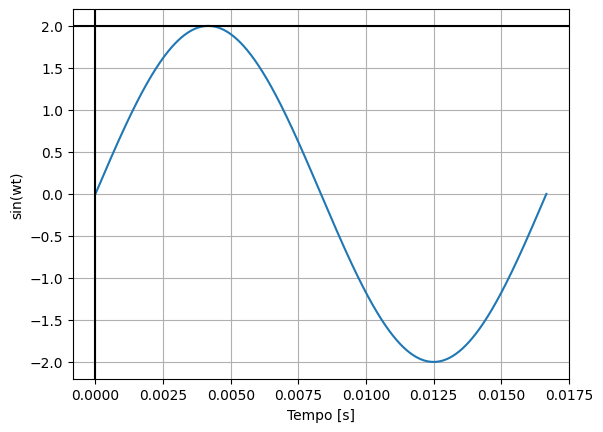

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

Am = 2.0  # Amplitude [V]
Ofst = Am # [V]
f = 60    # Frequência [Hz]
T = 1/f
w = 2 * np.pi * f  # [rad/s]
t = np.linspace(0,  T, 1000)
modulante =  Am * np.sin(w * t)

plt.plot(t, modulante)
plt.axhline(y=Ofst, color='k', linestyle='-')  # eixo y=0
plt.axvline(x=0, color='k', linestyle='-')  # eixo x=0
plt.xlabel('Tempo [s]')
plt.ylabel('sin(wt)')
plt.axis('tight')
plt.grid()
plt.show()


# Amostragem da senoide


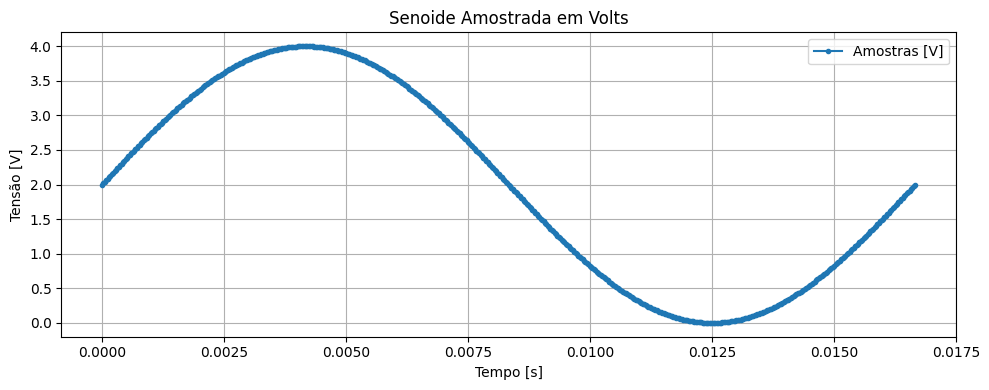

In [ ]:
fs = 35e3                              # Frequência de amostragem [Hz]
Ts = 1 / fs                            # Período de amostragem [s]
k = 1                                  # Fator de dimensionamento das amostras
Ns = int(np.round((T / Ts) * k))       # Número de amostras
t = np.linspace(0, T, Ns)              # Vetor de tempo
samples = Ofst + Am * np.sin(w * t)    # Amostras


plt.figure(figsize=(10, 4))
plt.plot(t, samples, marker='o', linestyle='-', markersize=3, label='Amostras [V]')
plt.xlabel('Tempo [s]')
plt.ylabel('Tensão [V]')
plt.title('Senoide Amostrada em Volts')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Conversão para a carga do registrador

$L_n = S_n \cdot \frac{L^{max}}{S^{max}} $ 

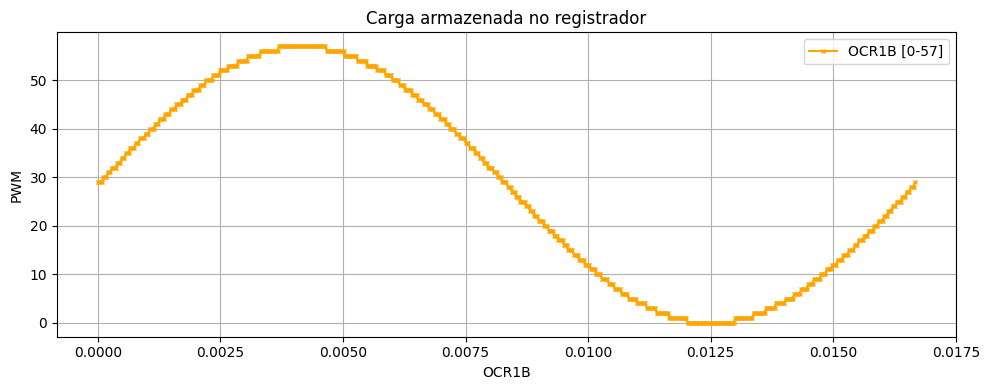

In [ ]:
Lmax = 40
Smax = samples.max()

load = ((samples * (Lmax / Smax))).round().astype(int)

plt.figure(figsize=(10, 4))
plt.plot(t, load, marker='x', linestyle='-', color='orange', markersize=3, label=f'OCR1B [0-{Lmax}]')
plt.xlabel('OCR1B')
plt.ylabel('PWM')
plt.title('Carga armazenada no registrador')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Exportando os dados

In [ ]:
# Criação do DataFrame
df = pd.DataFrame({'Tempo[s]': t,'Amostras[V]': samples, 'CargaRegistrador': load})
# Exibição do DataFrame
display(df)
# Exportação para arquivo CSV
df.to_csv('SenoideAmostrada.csv', index=False)

,Tempo[s],Amostras[V],CargaRegistrador
0,0.000000,2.000000,29
1,0.000029,2.021591,29
2,0.000057,2.043180,29
3,0.000086,2.064764,29
4,0.000115,2.086340,30
...,...,...,...
578,0.016552,1.913660,27
579,0.016581,1.935236,28
580,0.016609,1.956820,28
581,0.016638,1.978409,28


# Criando vetor de amostras paa gerar sin no arduino

In [ ]:
arduino_array = ', '.join([f'{x:.4f}' for x in load])

arduino_code = f"float amostras[{len(load)}] = {{ {arduino_array} }};"
print(arduino_code)

float amostras[583] = { 29.0000, 29.0000, 29.0000, 29.0000, 30.0000, 30.0000, 30.0000, 31.0000, 31.0000, 31.0000, 32.0000, 32.0000, 32.0000, 32.0000, 33.0000, 33.0000, 33.0000, 34.0000, 34.0000, 34.0000, 35.0000, 35.0000, 35.0000, 36.0000, 36.0000, 36.0000, 36.0000, 37.0000, 37.0000, 37.0000, 38.0000, 38.0000, 38.0000, 38.0000, 39.0000, 39.0000, 39.0000, 40.0000, 40.0000, 40.0000, 40.0000, 41.0000, 41.0000, 41.0000, 42.0000, 42.0000, 42.0000, 42.0000, 43.0000, 43.0000, 43.0000, 43.0000, 44.0000, 44.0000, 44.0000, 44.0000, 45.0000, 45.0000, 45.0000, 45.0000, 46.0000, 46.0000, 46.0000, 46.0000, 47.0000, 47.0000, 47.0000, 47.0000, 48.0000, 48.0000, 48.0000, 48.0000, 48.0000, 49.0000, 49.0000, 49.0000, 49.0000, 50.0000, 50.0000, 50.0000, 50.0000, 50.0000, 51.0000, 51.0000, 51.0000, 51.0000, 51.0000, 52.0000, 52.0000, 52.0000, 52.0000, 52.0000, 52.0000, 53.0000, 53.0000, 53.0000, 53.0000, 53.0000, 53.0000, 53.0000, 54.0000, 54.0000, 54.0000, 54.0000, 54.0000, 54.0000, 54.0000, 55.0000, 55.0

$f_C = \frac{1}{2 \pi RC}; C = 100.0u \Rightarrow R =  \frac{1}{2 \pi f_c * C}$

In [ ]:
C = 5e-6
R = 1/ (2 * np.pi * 60 * C)
print(R)

530.5164769729845


In [ ]:
R = 22
f_c = 1 / (2 * np.pi * R * C)
print(f_c)

1446.8631190172302
